In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cbsodata
import seaborn as sns

In [3]:
toc = pd.DataFrame(cbsodata.get_table_list())

In [4]:
data = pd.DataFrame(cbsodata.get_data('83056NED'))
print(data.head())

   ID                  Geslacht        Leeftijd  Marges Perioden  \
0   0  Totaal mannen en vrouwen  15 tot 75 jaar  Waarde     2014   
1   1  Totaal mannen en vrouwen  15 tot 75 jaar  Waarde     2015   
2   2  Totaal mannen en vrouwen  15 tot 75 jaar  Waarde     2016   
3   3  Totaal mannen en vrouwen  15 tot 75 jaar  Waarde     2017   
4   4  Totaal mannen en vrouwen  15 tot 75 jaar  Waarde     2018   

   ZiekteverzuimpercentageWerknemers_1  AandeelWerknemersDatHeeftVerzuimd_2  \
0                                  3.7                                 43.0   
1                                  4.0                                 44.9   
2                                  3.8                                 45.7   
3                                  4.0                                 44.0   
4                                  4.4                                 47.9   

   GemiddeldeVerzuimfrequentie_3  GemiddeldeVerzuimduur_4  k_1Tot5Werkdagen_5  \
0                            1.0   

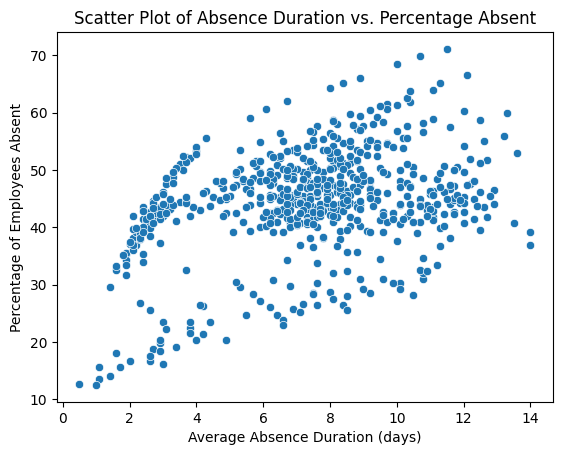

In [5]:
sns.scatterplot(data=data, x='GemiddeldeVerzuimduur_4', y='AandeelWerknemersDatHeeftVerzuimd_2')
plt.xlabel('Average Absence Duration (days)')
plt.ylabel('Percentage of Employees Absent')
plt.title('Scatter Plot of Absence Duration vs. Percentage Absent')
plt.show()

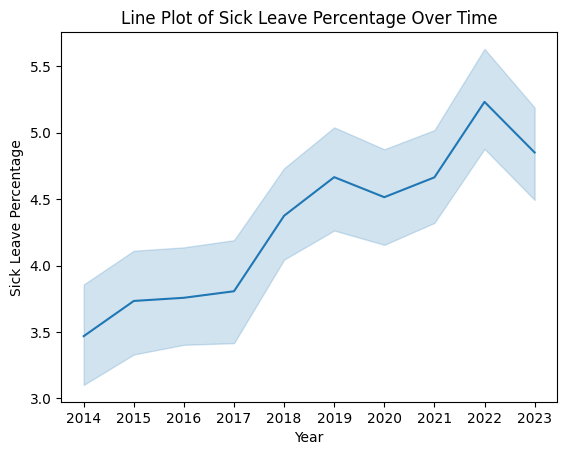

In [6]:
sns.lineplot(data=data, x='Perioden', y='ZiekteverzuimpercentageWerknemers_1')
plt.xlabel('Year')
plt.ylabel('Sick Leave Percentage')
plt.title('Line Plot of Sick Leave Percentage Over Time')
plt.show()

In [7]:
import plotly.express as px

fig = px.bar(data, x='Perioden', y='GemiddeldeVerzuimfrequentie_3', title='Bar Chart of Average Absence Frequency Over Time')
fig.show()

In [8]:
fig = px.scatter(data, x='Perioden', y='GemiddeldeVerzuimduur_4',
                 size='AandeelWerknemersDatHeeftVerzuimd_2', color='Perioden',
                 title='Bubble Chart of Absence Duration and Percentage Absent Over Time')
fig.show()

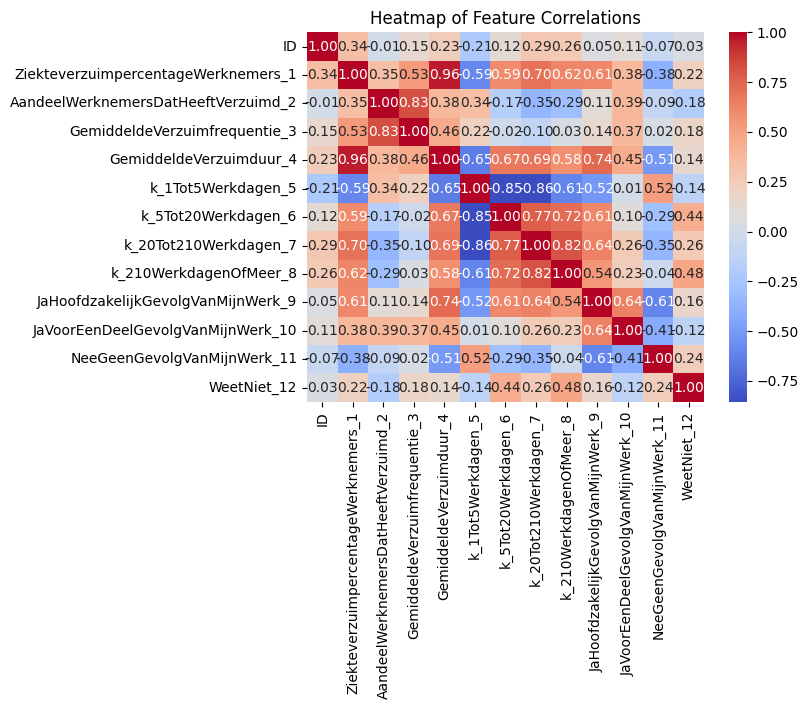

In [9]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()